# Analisis Sentimen Gojek (Arunika Laut)

Anggota Kelompok:
1. Anisa Dwi Asmaranti
2. Archam Zahidin
3. Moch. Emil Idad
4. Ryan Prasetyo

## A. Load Data


In [59]:
import pandas as pd
data = pd.read_csv('gojek_10k_fix.csv')

In [60]:
data.head()

,Unnamed: 0,source,id_ulasan,pengguna,ulasan,rating,tanggal
0,0,Google Play,c8e7db37-cdd5-48c8-b96f-515a0d7213a5,Pengguna Google,"Perbaiki driver "" Yg gak niat yg sering cencel...",3,2024-11-28 18:17:02
1,1,Google Play,b7e7af1d-0c06-4d45-85e6-2d5ca2ac3e17,Pengguna Google,Bagus,5,2024-11-28 18:14:50
2,2,Google Play,acdcbd58-8d0c-4cfb-a3a3-4f59a3d3fdff,Pengguna Google,Jadi transportasi langganan dari dulu. Service...,5,2024-11-28 18:05:34
3,3,Google Play,3c4b51a3-659a-48d5-8e6f-50fdb335c1eb,Pengguna Google,"Gw top up ,tiba tiba kena tagihan top up gopay...",1,2024-11-28 17:58:05
4,4,Google Play,c3378b33-aa36-4a1d-afe4-1af3feeb2bd9,Pengguna Google,jos margondos,5,2024-11-28 17:41:38


In [61]:
df = pd.DataFrame(data[['tanggal', 'pengguna', 'rating', 'ulasan']])

In [62]:
df.head()

,tanggal,pengguna,rating,ulasan
0,2024-11-28 18:17:02,Pengguna Google,3,"Perbaiki driver "" Yg gak niat yg sering cencel..."
1,2024-11-28 18:14:50,Pengguna Google,5,Bagus
2,2024-11-28 18:05:34,Pengguna Google,5,Jadi transportasi langganan dari dulu. Service...
3,2024-11-28 17:58:05,Pengguna Google,1,"Gw top up ,tiba tiba kena tagihan top up gopay..."
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos


## B. Preprocessing Data

### B1. Membersihkan Data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   10000 non-null  object
 1   pengguna  10000 non-null  object
 2   rating    10000 non-null  int64 
 3   ulasan    10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [64]:
df.isna().sum()

tanggal     0
pengguna    0
rating      0
ulasan      0
dtype: int64

In [65]:
df['rating'].value_counts()

rating
5    6015
1    2710
4     503
2     412
3     360
Name: count, dtype: int64

In [66]:
df.duplicated().sum()

np.int64(0)

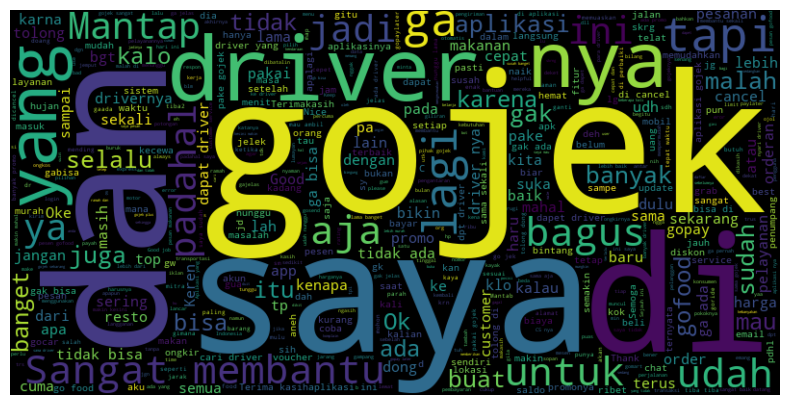

In [67]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['ulasan'] = df['ulasan'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['ulasan'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'yg'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"# emoticons
            u"\U0001F300-\U0001F5FF" # symbols & pictographs
            u"\U0001F680-\U0001F6FF" # transport & map symbols
            u"\U0001F700-\U0001F77F" # alchemical symbols
            u"\U0001F780-\U0001F7FF" # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F" # Chess Symbols
            u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF" # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"# flags
                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols (tweet):
    if tweet is not None and isinstance (tweet, str):
        tweet = re.sub(r' [^a-zA-Z0-9\s]', '', tweet)
    return tweet
# Fungsi untuk menghapus angka
def remove_numbers (tweet):
    if tweet is not None and isinstance (tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet
df['cleaning'] = df['ulasan'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))
df.head(10)

,tanggal,pengguna,rating,ulasan,cleaning
0,2024-11-28 18:17:02,Pengguna Google,3,"Perbaiki driver "" Yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...
1,2024-11-28 18:14:50,Pengguna Google,5,Bagus,Bagus
2,2024-11-28 18:05:34,Pengguna Google,5,Jadi transportasi langganan dari dulu. Service...,Jadi transportasi langganan dari dulu. Service...
3,2024-11-28 17:58:05,Pengguna Google,1,"Gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos
5,2024-11-28 17:37:31,Pengguna Google,1,penyelesaian masalah ketika resto memberikan e...,penyelesaian masalah ketika resto memberikan e...
6,2024-11-28 17:34:08,Pengguna Google,4,Top,Top
7,2024-11-28 17:14:08,Pengguna Google,5,Suka,Suka
8,2024-11-28 17:09:24,Pengguna Google,1,Halo gojek disini merupakan salah satu penggun...,Halo gojek disini merupakan salah satu penggun...
9,2024-11-28 17:02:27,Pengguna Google,1,"udah mesen berkali"" ngak ada yang mau","udah mesen berkali"" ngak ada yang mau"


### C2. Case Folding

In [69]:
df['ulasan'] = df['ulasan'].str.lower()
df.head()

,tanggal,pengguna,rating,ulasan,cleaning
0,2024-11-28 18:17:02,Pengguna Google,3,"perbaiki driver "" yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...
1,2024-11-28 18:14:50,Pengguna Google,5,bagus,Bagus
2,2024-11-28 18:05:34,Pengguna Google,5,jadi transportasi langganan dari dulu. service...,Jadi transportasi langganan dari dulu. Service...
3,2024-11-28 17:58:05,Pengguna Google,1,"gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos


### C3. Normalisasi

In [70]:
norm = {
    " dgn " : " dengan ", " dg " : " dengan ",
    " gue ": " saya  ", " sy " : " saya ",
    " bgs " : " bagus ", " mantap " : " bagus ", " good " : " bagus ",
    " bgmn " :" bagaimana ", " gimana " : " bagaimana ",
    " tdk " : " tidak ", " ga " : " tidak ", " gx " : " tidak ", " ga " : " tidak ",
    " bgt " : " banget ",
    " fast " : " cepat ", " cpt " : " cepat ",
    " sgt " : " sangat ",
    " tp " : " tapi ",
    " jgn " : " jgn ",
    " gt " : " gitu ",
    " kmn " : " kemana ",
    " cwe " : " perempuan ",
    " cwo " : " laki-laki ",
    " mksd " : " maksud ",
    " sdh " : " sudah ", " udh " : " sudah ", " uda " : " sudah ",
    " klo " : " kalau ",
    " lg " : " lagi ",
    " trs " : " terus ",
    " blg " : " bilang ",
    " blkng " : " belakang ",
    " lbh " : " lebih ",
    " bhy " : " bahaya ",
    " loding " : " loading ",
    " duid " : " uang ",
    " customer " : " pengguna ", " user " : " pengguna ",
    " bener " : " benar ", " bnr " : " benar ",
    " rekomended " : " rekomen ", " recommended " : " rekomen ", " recomend " : " rekomen "
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['ulasan'] = df['ulasan'].apply(lambda x: normalisasi(x))
df.head()

,tanggal,pengguna,rating,ulasan,cleaning
0,2024-11-28 18:17:02,Pengguna Google,3,"perbaiki driver "" yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...
1,2024-11-28 18:14:50,Pengguna Google,5,bagus,Bagus
2,2024-11-28 18:05:34,Pengguna Google,5,jadi transportasi langganan dari dulu. service...,Jadi transportasi langganan dari dulu. Service...
3,2024-11-28 17:58:05,Pengguna Google,1,"gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos


In [ ]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append('<karakter eksplisit>')
                    kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = " ".join(replaced_words)
    else:
        replaced_text = ""
        kalimat_baku = []
        kata_diganti = []
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
df = pd.DataFrame(df[['tanggal', 'pengguna', 'rating', 'ulasan', 'cleaning']])

In [ ]:
df.head()

### C4.Tokenize

In [71]:
def tokenize(text):
    tokens = text.split()
    return tokens
df['tokenize'] = df['ulasan'].apply(tokenize)
df.head(5)

,tanggal,pengguna,rating,ulasan,cleaning,tokenize
0,2024-11-28 18:17:02,Pengguna Google,3,"perbaiki driver "" yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...,"[perbaiki, driver, "", yg, gak, niat, yg, serin..."
1,2024-11-28 18:14:50,Pengguna Google,5,bagus,Bagus,[bagus]
2,2024-11-28 18:05:34,Pengguna Google,5,jadi transportasi langganan dari dulu. service...,Jadi transportasi langganan dari dulu. Service...,"[jadi, transportasi, langganan, dari, dulu., s..."
3,2024-11-28 17:58:05,Pengguna Google,1,"gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...,"[gw, top, up, ,tiba, tiba, kena, tagihan, top,..."
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos,"[jos, margondos]"


### C5. Stopwords

In [72]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]
df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,tanggal,pengguna,rating,ulasan,cleaning,tokenize,stopword removal
0,2024-11-28 18:17:02,Pengguna Google,3,"perbaiki driver "" yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...,"[perbaiki, driver, "", yg, gak, niat, yg, serin...","[perbaiki, driver, "", yg, gak, niat, yg, cence..."
1,2024-11-28 18:14:50,Pengguna Google,5,bagus,Bagus,[bagus],[bagus]
2,2024-11-28 18:05:34,Pengguna Google,5,jadi transportasi langganan dari dulu. service...,Jadi transportasi langganan dari dulu. Service...,"[jadi, transportasi, langganan, dari, dulu., s...","[transportasi, langganan, dulu., service, ok,,..."
3,2024-11-28 17:58:05,Pengguna Google,1,"gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...,"[gw, top, up, ,tiba, tiba, kena, tagihan, top,...","[gw, top, up, ,tiba, kena, tagihan, top, up, g..."
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos,"[jos, margondos]","[jos, margondos]"


### C6.Stemming

In [75]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [76]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,tanggal,pengguna,rating,ulasan,cleaning,tokenize,stopword removal,steming_data
0,2024-11-28 18:17:02,Pengguna Google,3,"perbaiki driver "" yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...,"[perbaiki, driver, "", yg, gak, niat, yg, serin...","[perbaiki, driver, "", yg, gak, niat, yg, cence...",baik driver yg gak niat yg cencel order
1,2024-11-28 18:14:50,Pengguna Google,5,bagus,Bagus,[bagus],[bagus],bagus
2,2024-11-28 18:05:34,Pengguna Google,5,jadi transportasi langganan dari dulu. service...,Jadi transportasi langganan dari dulu. Service...,"[jadi, transportasi, langganan, dari, dulu., s...","[transportasi, langganan, dulu., service, ok,,...",transportasi langgan dulu service ok dpt drive...
3,2024-11-28 17:58:05,Pengguna Google,1,"gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...,"[gw, top, up, ,tiba, tiba, kena, tagihan, top,...","[gw, top, up, ,tiba, kena, tagihan, top, up, g...",gw top up tiba kena tagih top up gopay 13ribu ...
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos,"[jos, margondos]","[jos, margondos]",jos margondos


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           10000 non-null  object
 1   pengguna          10000 non-null  object
 2   rating            10000 non-null  int64 
 3   ulasan            10000 non-null  object
 4   cleaning          10000 non-null  object
 5   tokenize          10000 non-null  object
 6   stopword removal  10000 non-null  object
 7   steming_data      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [78]:
df.to_csv('ulasan_gojek_bersih_fix.csv', encoding='utf8', index=False)

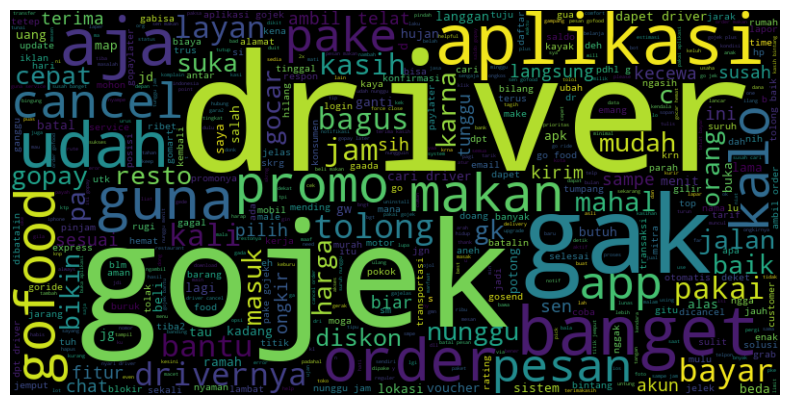

In [81]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
# df['steming_data'] = df['steming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ''.join(df['steming_data'].astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'nya', 'yg', 'ya'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## C. Labeling

In [2]:
import pandas as pd

df = pd.read_csv('ulasan_gojek_bersih_fix.csv')
df.head()

,tanggal,pengguna,rating,ulasan,cleaning,tokenize,stopword removal,steming_data
0,2024-11-28 18:17:02,Pengguna Google,3,"perbaiki driver "" yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...,"['perbaiki', 'driver', '""', 'yg', 'gak', 'niat...","['perbaiki', 'driver', '""', 'yg', 'gak', 'niat...",baik driver yg gak niat yg cencel order
1,2024-11-28 18:14:50,Pengguna Google,5,bagus,Bagus,['bagus'],['bagus'],bagus
2,2024-11-28 18:05:34,Pengguna Google,5,jadi transportasi langganan dari dulu. service...,Jadi transportasi langganan dari dulu. Service...,"['jadi', 'transportasi', 'langganan', 'dari', ...","['transportasi', 'langganan', 'dulu.', 'servic...",transportasi langgan dulu service ok dpt drive...
3,2024-11-28 17:58:05,Pengguna Google,1,"gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...,"['gw', 'top', 'up', ',tiba', 'tiba', 'kena', '...","['gw', 'top', 'up', ',tiba', 'kena', 'tagihan'...",gw top up tiba kena tagih top up gopay 13ribu ...
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos,"['jos', 'margondos']","['jos', 'margondos']",jos margondos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           10000 non-null  object
 1   pengguna          10000 non-null  object
 2   rating            10000 non-null  int64 
 3   ulasan            10000 non-null  object
 4   cleaning          9916 non-null   object
 5   tokenize          10000 non-null  object
 6   stopword removal  10000 non-null  object
 7   steming_data      9790 non-null   object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9790 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           9790 non-null   object
 1   pengguna          9790 non-null   object
 2   rating            9790 non-null   int64 
 3   ulasan            9790 non-null   object
 4   cleaning          9790 non-null   object
 5   tokenize          9790 non-null   object
 6   stopword removal  9790 non-null   object
 7   steming_data      9790 non-null   object
dtypes: int64(1), object(7)
memory usage: 688.4+ KB


In [6]:
# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment (sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
df['Sentiment'] = replace_none_sentiment (df ['Sentiment'].tolist())
df.head()

,tanggal,pengguna,rating,ulasan,cleaning,tokenize,stopword removal,steming_data,Sentiment
0,2024-11-28 18:17:02,Pengguna Google,3,"perbaiki driver "" yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...,"['perbaiki', 'driver', '""', 'yg', 'gak', 'niat...","['perbaiki', 'driver', '""', 'yg', 'gak', 'niat...",baik driver yg gak niat yg cencel order,Positif
1,2024-11-28 18:14:50,Pengguna Google,5,bagus,Bagus,['bagus'],['bagus'],bagus,Negatif
2,2024-11-28 18:05:34,Pengguna Google,5,jadi transportasi langganan dari dulu. service...,Jadi transportasi langganan dari dulu. Service...,"['jadi', 'transportasi', 'langganan', 'dari', ...","['transportasi', 'langganan', 'dulu.', 'servic...",transportasi langgan dulu service ok dpt drive...,Positif
3,2024-11-28 17:58:05,Pengguna Google,1,"gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...,"['gw', 'top', 'up', ',tiba', 'tiba', 'kena', '...","['gw', 'top', 'up', ',tiba', 'kena', 'tagihan'...",gw top up tiba kena tagih top up gopay 13ribu ...,Negatif
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos,"['jos', 'margondos']","['jos', 'margondos']",jos margondos,Positif


C:\Users\archa\AppData\Local\Temp\ipykernel_14732\1784283309.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


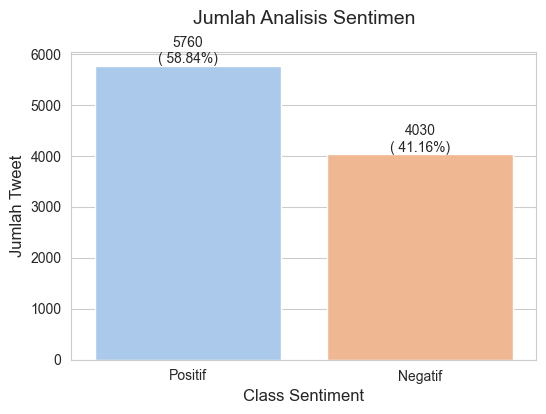

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f' {100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()


In [8]:
df.to_csv('labeling_ulasan_gojek.csv', encoding='utf8', index=False)

## Model Algoritma SVM

In [9]:
import pandas as pd

df = pd.read_csv('labeling_ulasan_gojek.csv')
df.head()

,tanggal,pengguna,rating,ulasan,cleaning,tokenize,stopword removal,steming_data,Sentiment
0,2024-11-28 18:17:02,Pengguna Google,3,"perbaiki driver "" yg gak niat yg sering cencel...",Perbaiki driver Yg gak niat yg sering cencel o...,"['perbaiki', 'driver', '""', 'yg', 'gak', 'niat...","['perbaiki', 'driver', '""', 'yg', 'gak', 'niat...",baik driver yg gak niat yg cencel order,Positif
1,2024-11-28 18:14:50,Pengguna Google,5,bagus,Bagus,['bagus'],['bagus'],bagus,Negatif
2,2024-11-28 18:05:34,Pengguna Google,5,jadi transportasi langganan dari dulu. service...,Jadi transportasi langganan dari dulu. Service...,"['jadi', 'transportasi', 'langganan', 'dari', ...","['transportasi', 'langganan', 'dulu.', 'servic...",transportasi langgan dulu service ok dpt drive...,Positif
3,2024-11-28 17:58:05,Pengguna Google,1,"gw top up ,tiba tiba kena tagihan top up gopay...",Gw top uptiba tiba kena tagihan top up gopay r...,"['gw', 'top', 'up', ',tiba', 'tiba', 'kena', '...","['gw', 'top', 'up', ',tiba', 'kena', 'tagihan'...",gw top up tiba kena tagih top up gopay 13ribu ...,Negatif
4,2024-11-28 17:41:38,Pengguna Google,5,jos margondos,jos margondos,"['jos', 'margondos']","['jos', 'margondos']",jos margondos,Positif


In [12]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.2, random_state=42)

In [13]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [14]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [15]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 7832
Jumlah Data Uji: 1958


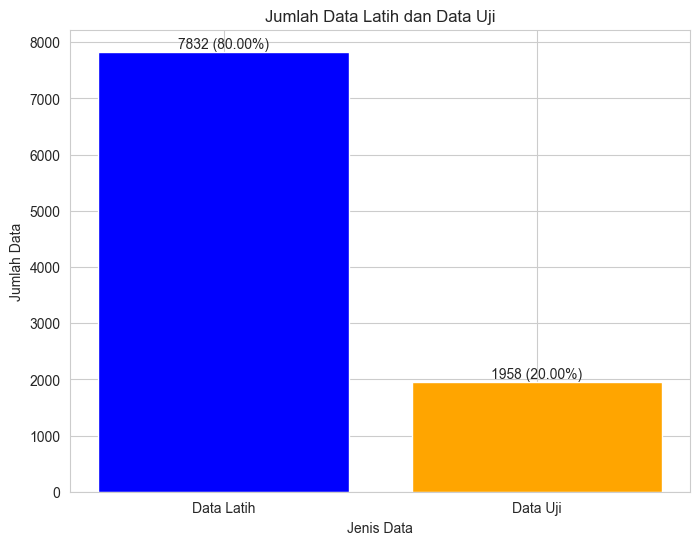

In [16]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar (['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
        ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

## SVM

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Define the vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [20]:
# Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())

# menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, : ].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
# Membuat dan melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [22]:
# Evaluasi Model
y_pred_svm = svm.predict(X_test_vectorized)

In [23]:
# Menampilkan confusion matrix dalam angka
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

SVM Confusion Matrix:
[[586 232]
 [179 961]]


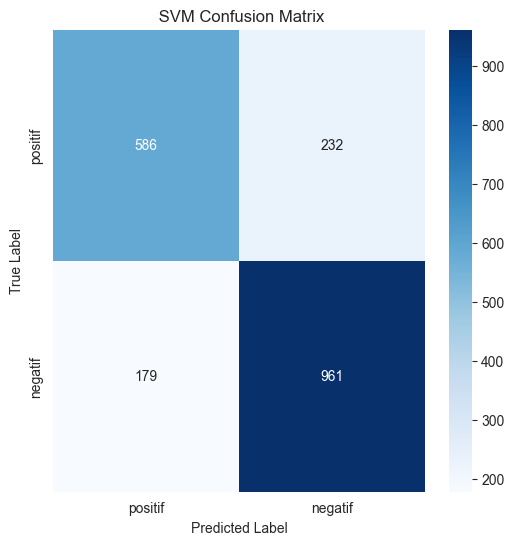

In [24]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['positif', 'negatif'],
                yticklabels=['positif', 'negatif'])
    
    plt.title(f" {model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix("SVM", y_test, y_pred_svm)

In [26]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("")

accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")

# Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7900919305413687

SVM Accuracy: 79.01%

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.77      0.72      0.74       818
     Positif       0.81      0.84      0.82      1140

    accuracy                           0.79      1958
   macro avg       0.79      0.78      0.78      1958
weighted avg       0.79      0.79      0.79      1958

